In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 200 

In [2]:
df = pd.read_csv('data/df_clean_2.csv')

In [3]:
# use Limit Bal to train and test the regression model
# get the x values in the right shape
x_values = df['LIMIT_BAL'].values.reshape(-1,1)
y_values = df['default payment next month'].values

# split the date into test and train
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values,
                                                    train_size=0.2, random_state=24)

# initialize model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [6]:
print(f'{np.mean(y_test)}, {np.mean(y_train)}')

0.22093568348021753, 0.22524381095273818


In [7]:
# array of predicted probabilites
y_pred_proba = lr.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]

Text(0.5, 1.0, 'ROC curve')

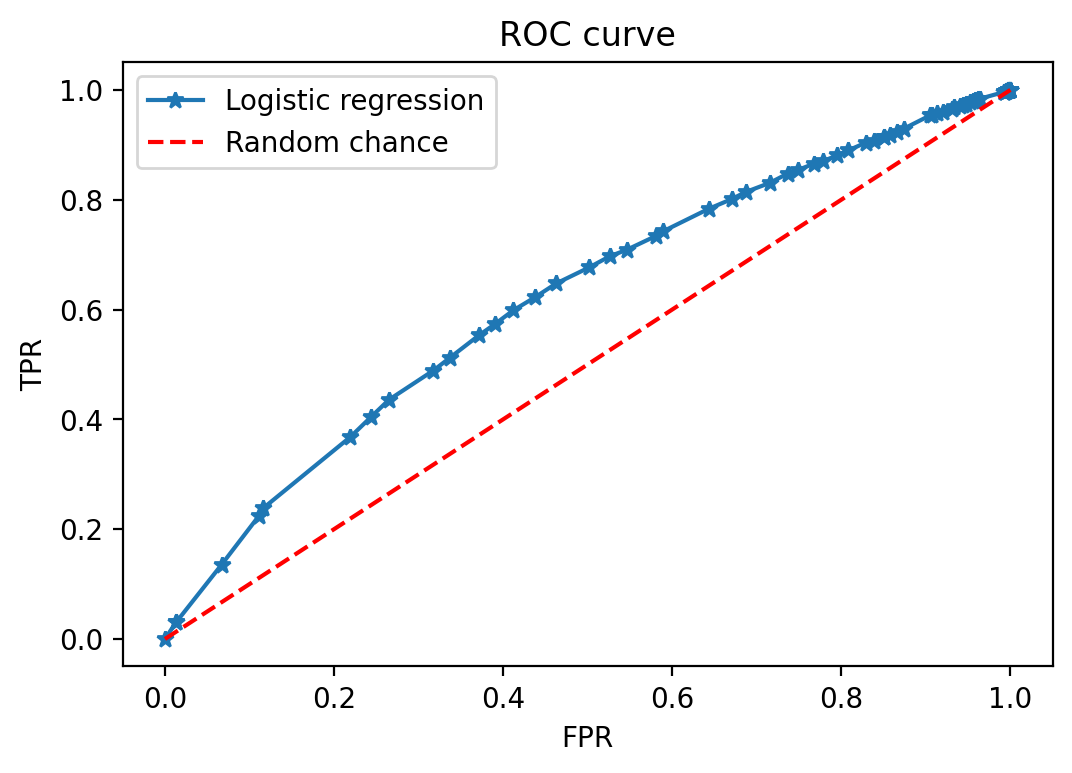

In [8]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [10]:
# calculate roc auc score
metrics.roc_auc_score(y_test, pos_proba)

0.6198201139153586

AUC score for Limit Bal is better than Education

Text(0.5, 1.0, 'Precision-Recall Curve')

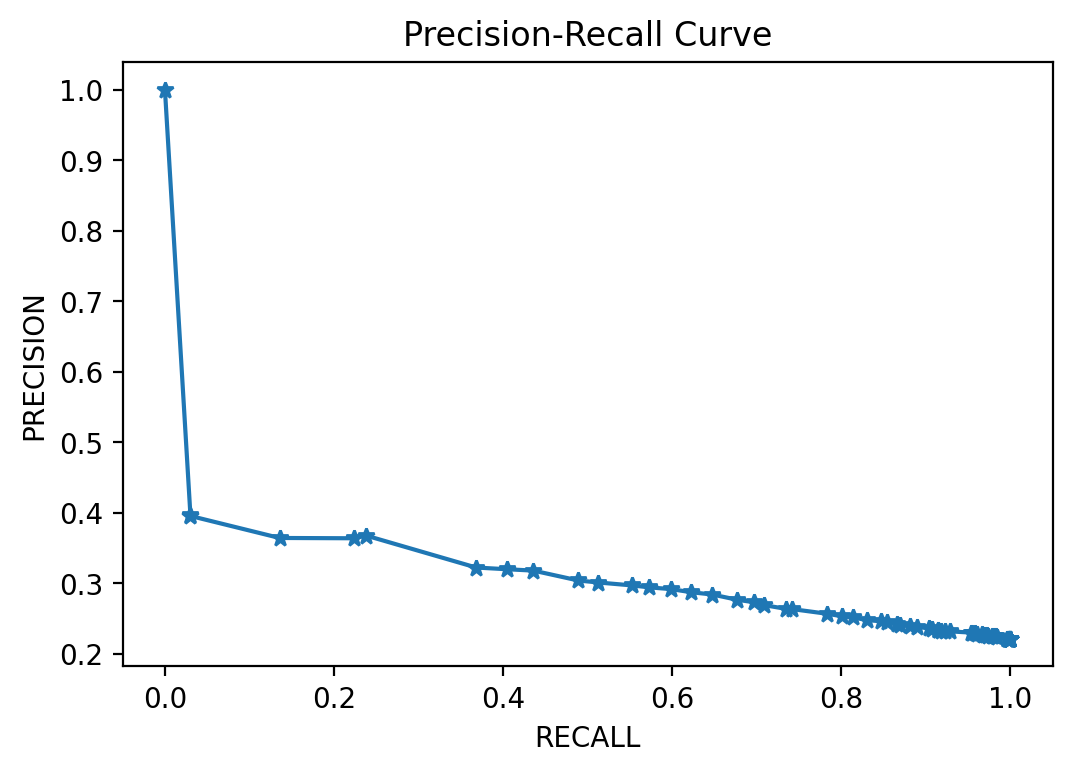

In [11]:
# plot precision recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)

plt.plot(recall, precision, '*-')
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('Precision-Recall Curve')

In [12]:
metrics.auc(recall, precision)

0.3164203779277336

The precision-recall curve shows that precision is generally fairly low for this model. For nearly all of the range of thresholds, the precision, or portion of positive classifications that are correct, is less than half.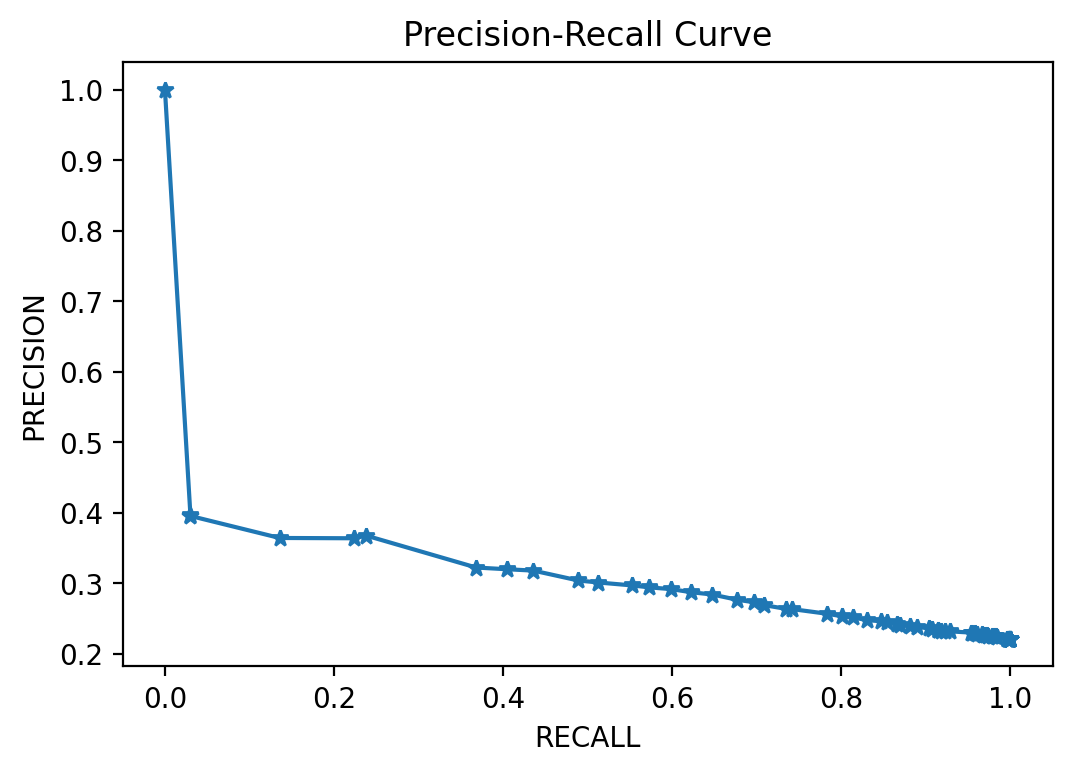

In [14]:
# calculate train data ROC AUC
y_pred_proba_2 = lr.predict_proba(X_train)
pos_proba_2 = y_pred_proba_2[:, 1]
metrics.roc_auc_score(y_train, pos_proba_2)

0.613639968790633

We can see that this AUC is not all that different from the test data ROC AUC we calculated earlier. Both are about 0.62. Thus, the model does about as well on out-of-sample data as it does on the same data used in model training.